# P02 Rozkład


In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

**Wykorzystam chi kwadrat jako test statystyczny**


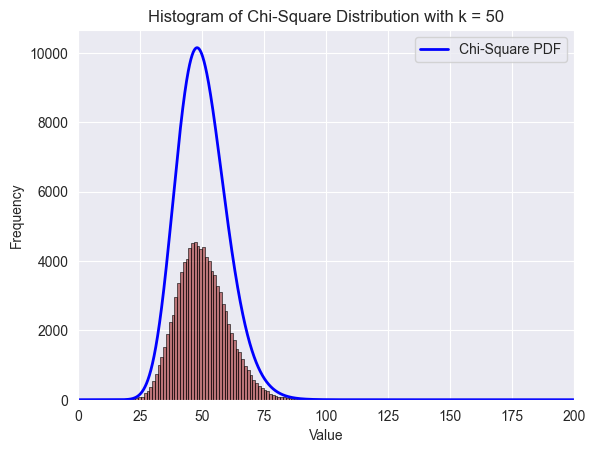

In [35]:
k = 50
n = 100000
mean = k
variance = 2 * k

observations = np.random.chisquare(k, n)

x = np.linspace(0, 4 * k, n)
pdf = stats.chi2.pdf(x, k)


sns.histplot(
    observations, bins=80, kde=False, edgecolor="k", color="darkred", alpha=0.5
)
sns.lineplot(
    x=x,
    y=pdf * len(observations) * (k / 20),
    color="blue",
    lw=2,
    label="Chi-Square PDF",
)
sns.set_style("darkgrid")
plt.title(f"Histogram of Chi-Square Distribution with k = {k}")
plt.xlabel("Value")
plt.xlim(0, 4 * k)
plt.ylabel("Frequency")
plt.show()

W sumie to tak okej, napewno się zgadza wygląd rozkładu, nie mogę tego samego powiedzieć o wartości.


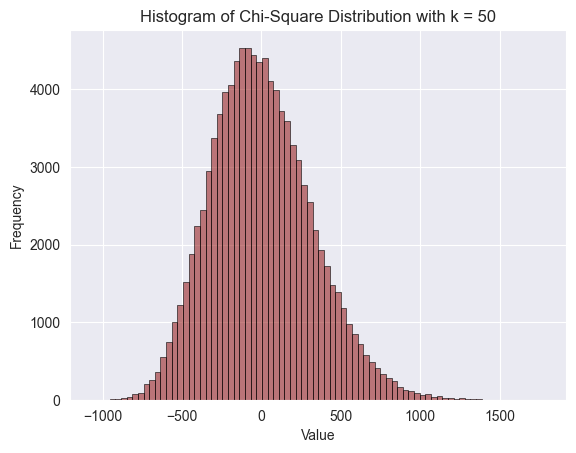

In [36]:
z_realizations = []

for el in observations:
    z_realizations.append((el - mean) / np.sqrt(variance / n))

sns.histplot(
    z_realizations, bins=80, kde=False, edgecolor="k", color="darkred", alpha=0.5
)
sns.set_style("darkgrid")
plt.title(f"Histogram of Chi-Square Distribution with k = {k}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()